In [3]:
from sklearn import model_selection, ensemble, datasets, tree
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np

In [2]:
digits = datasets.load_digits()
X = digits['data']
y = digits['target']

In [3]:
def write_answer_to_file(answer, filename):
    print(answer)
    with open(filename, 'w') as f_out:
        f_out.write(str(answer))
        

def get_score(estimator):
    return model_selection.cross_val_score(estimator, X, y, cv = 10, n_jobs=-1)

In [4]:
DesicionTree = tree.DecisionTreeClassifier()
answer_1 = get_score(DesicionTree).mean()
write_answer_to_file(answer_1,'1.txt')

0.8263161683037854


In [5]:
bagging = ensemble.BaggingClassifier(base_estimator = DesicionTree, n_estimators = 100)
answer_2 = get_score(bagging).mean()
write_answer_to_file(answer_2,'2.txt')
print('DesicionTree:', answer_1, '\nBagging:', answer_2)

0.9243647746499633
DesicionTree: 0.8263161683037854 
Bagging: 0.9243647746499633


In [6]:
max_feat =  int(np.sqrt(X.shape[1]))
bagging_features = ensemble.BaggingClassifier(DesicionTree, n_estimators = 100, max_features = max_feat)
answer_3 = get_score(bagging_features).mean()
write_answer_to_file(answer_3,'3.txt')

0.9288057113577951


In [ ]:
bagging_features_nodes = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_features = max_feat),
                                                    n_estimators = 100)
answer_4 = get_score(bagging_features_nodes).mean()
write_answer_to_file(answer_4,'4.txt')

In [8]:
random_forest = ensemble.RandomForestClassifier(n_estimators = 100, max_features = max_feat)
random_score = get_score(random_forest)
print(random_score.mean())

0.9515863065110619


In [9]:
def create_val_curve(estimator, params, param_name):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name = param_name,
                                                 param_range = params, cv = 10,
                                                 scoring = "accuracy", n_jobs = -1)
    test_scores_mean = test_scores.mean(axis = 1)
    train_scores_mean = train_scores.mean(axis = 1)
    plt.title("Validation Curve with RandomForest")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.5, 1.1)
    plt.plot(params, test_scores_mean, color = 'green', label = 'Test')
    plt.plot(params, train_scores_mean, color = 'red', label = 'Train')
    plt.legend()

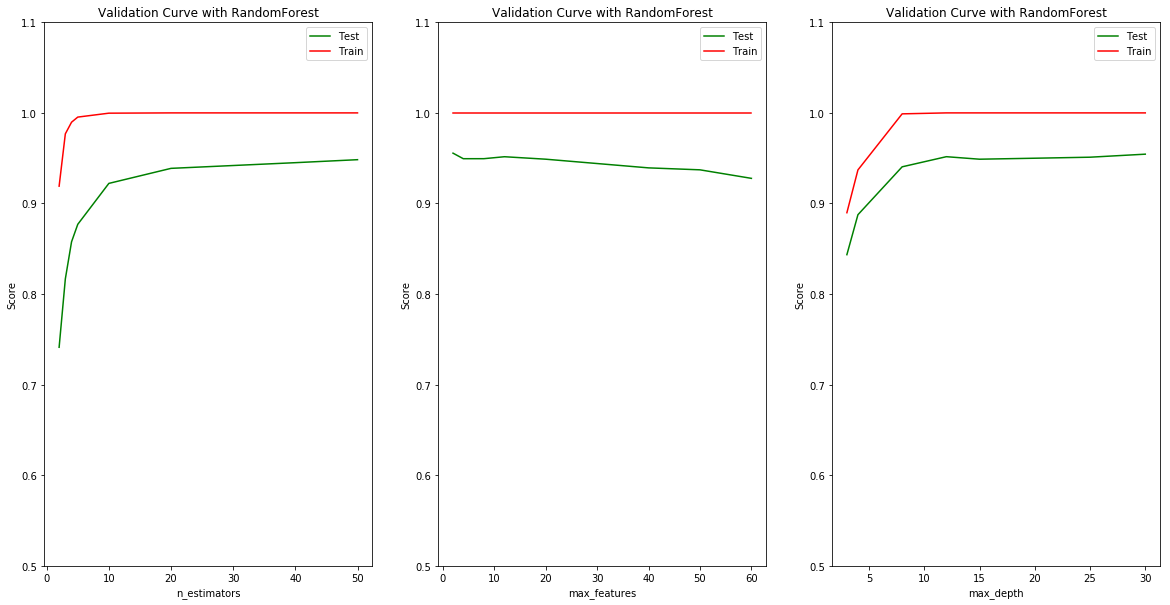

In [10]:
plt.figure(figsize = (20,10))
plt.subplot(1, 3, 1)
create_val_curve(random_forest, [2,3,4,5,10,20,40,50], 'n_estimators')
plt.subplot(1, 3, 2)
create_val_curve(random_forest, [2,4,8,12,20,40,50,60], 'max_features')
plt.subplot(1, 3, 3)
create_val_curve(random_forest, [3,4,8,12,15,20,25,30], 'max_depth')

In [11]:
answer_5 = '2 3 4 7'
write_answer_to_file(answer_5, '5.txt')

2 3 4 7


### All answers were checked